In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
import csv

In [ ]:
 def music_recommender(userPreferences):
  raw_data = pd.read_csv('genres_v2.csv', dtype={'song_name': 'str'})
  print(raw_data.shape)

In [ ]:
  pd.set_option('display.max_columns', None)

In [ ]:
  raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
 nulls = raw_data.isnull().sum()
 print(nulls)

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [ ]:
 training_data = raw_data.drop(['type', 'uri', 'track_href', 'analysis_url',
                                       'song_name', 'Unnamed: 0', 'title', 'genre'], axis=1, inplace=False)

 print(training_data.shape)

(42305, 14)


In [ ]:
training_data = training_data[training_data.key != -1]
print("after dropping some rows:\n", training_data.shape)
print(training_data.head())

print(training_data.shape)
print(training_data.duplicated().any())
training_data.drop_duplicates(inplace=True)
print(training_data.shape)

after dropping some rows:
 (36199, 15)
   danceability    energy       key  loudness  mode  speechiness  \
0      0.829884  0.813955  0.181818  0.712039   1.0     0.430304   
1      0.708527  0.492877  0.727273  0.715710   1.0     0.061410   
2      0.850471  0.892974  0.454545  0.782742   1.0     0.042890   
3      0.445227  0.780947  0.000000  0.784742   1.0     0.086971   
4      0.794127  0.623909  0.181818  0.703712   1.0     0.292754   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.060525          0.013549  0.045943  0.382028  0.610006     0.111487   
1      0.405870          0.000000  0.109792  0.108635  0.351848     0.224043   
2      0.013967          0.000004  0.369692  0.021046  0.986200     0.082507   
3      0.023987          0.000000  0.105699  0.161250  0.794595     0.110497   
4      0.219635          0.000000  0.158907  0.590426  0.554579     0.110088   

   time_signature                      id  cluster  
0            0.75 

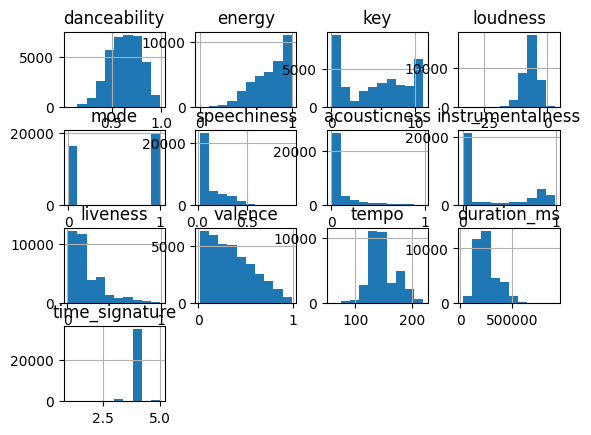

In [ ]:
 training_data.hist()
 plt.show()

In [ ]:

        # this global scalar will be fitted on training data and will be used for both training and test data
global_scalar = MinMaxScaler()
id_column = training_data['id']
training_data.drop(['id'], axis=1, inplace=True)
global_scalar.fit(training_data)
training_data = pd.DataFrame(global_scalar.transform(training_data),
                                     index=training_data.index,
                                     columns=training_data.columns)


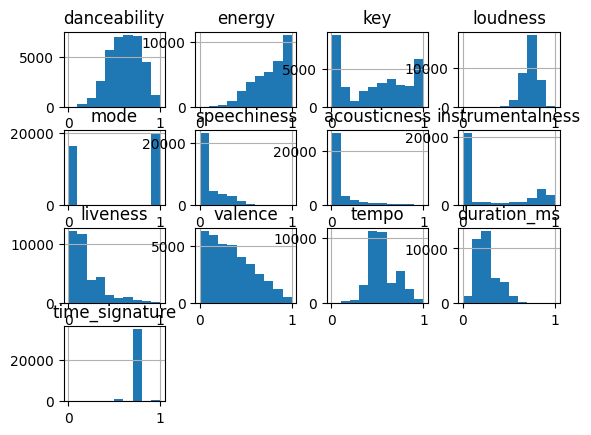

In [ ]:
training_data['id'] = id_column

training_data.hist()
plt.show()



In [ ]:
training_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 36199 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      36199 non-null  float64
 1   energy            36199 non-null  float64
 2   key               36199 non-null  float64
 3   loudness          36199 non-null  float64
 4   mode              36199 non-null  float64
 5   speechiness       36199 non-null  float64
 6   acousticness      36199 non-null  float64
 7   instrumentalness  36199 non-null  float64
 8   liveness          36199 non-null  float64
 9   valence           36199 non-null  float64
 10  tempo             36199 non-null  float64
 11  duration_ms       36199 non-null  float64
 12  time_signature    36199 non-null  float64
 13  id                36199 non-null  object 
dtypes: float64(13), object(1)
memory usage: 4.1+ MB


<ipython-input-68-8d4503d77460>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = training_data.corr()


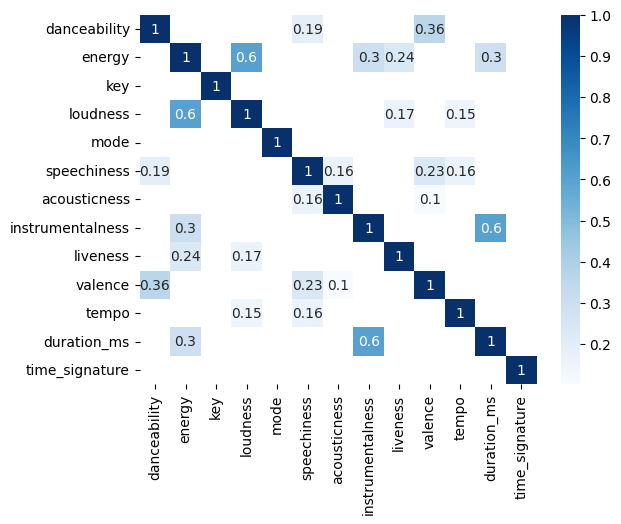

In [ ]:
corr = training_data.corr()
sns.heatmap(corr[corr > 0.1], cmap="Blues", annot=True)
plt.show()

K-mean clustering

In [ ]:
  kmeans = KMeans(n_clusters=10)
  training_data_clustered = kmeans.fit(training_data.drop(['id'], axis=1, inplace=False))
  training_data["cluster"] = training_data_clustered.labels_
  centroids = training_data_clustered.cluster_centers_
  print(training_data.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   danceability    energy       key  loudness  mode  speechiness  \
0      0.829884  0.813955  0.181818  0.712039   1.0     0.430304   
1      0.708527  0.492877  0.727273  0.715710   1.0     0.061410   
2      0.850471  0.892974  0.454545  0.782742   1.0     0.042890   
3      0.445227  0.780947  0.000000  0.784742   1.0     0.086971   
4      0.794127  0.623909  0.181818  0.703712   1.0     0.292754   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.060525          0.013549  0.045943  0.382028  0.610006     0.111487   
1      0.405870          0.000000  0.109792  0.108635  0.351848     0.224043   
2      0.013967          0.000004  0.369692  0.021046  0.986200     0.082507   
3      0.023987          0.000000  0.105699  0.161250  0.794595     0.110497   
4      0.219635          0.000000  0.158907  0.590426  0.554579     0.110088   

   time_signature                      id  cluster  
0            0.75  2Vc6NJ9PW9gD9q343XFRKx        0  
1   

In [ ]:
raw_data_genre = raw_data['genre'].value_counts().head(10)

fig = px.pie(raw_data_genre, names=raw_data_genre.index, values=raw_data_genre.values, title='Distribution of popular genre', labels=raw_data_genre.index)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


Pre processing the data

In [ ]:
import pandas as pd  # Import the Pandas library


df = pd.read_csv('/content/genres_v2.csv')  # Load your music data into the DataFrame 'df'
df_x = df[df.columns[:11]]
df_x.head()


<ipython-input-2-acc7fd70585f>:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/genres_v2.csv')  # Load your music data into the DataFrame 'df'


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988


In [ ]:
df_new = df_x.copy()
df_new['genre'] = df['genre']
df_new['time_signature'] = df['time_signature']
df_new['duration_ms'] = df['duration_ms']
df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_ms
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,Dark Trap,4,124539
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,Dark Trap,4,224427
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,Dark Trap,4,98821
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,Dark Trap,3,123661
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,Dark Trap,4,123298


In [ ]:
df_new['duration_min'] = df_new['duration_ms']/60000
df_new.drop('duration_ms',axis=1,inplace=True)

Feature scaling and Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x = df_new[df_new.drop(columns=['genre']).columns].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_df_scaled = pd.DataFrame(x_scaled)
x_df_scaled.columns = list(df_new.drop(['genre'], axis=1).columns)

In [ ]:
df_new[df_new.drop(columns=['genre']).columns] = x_scaled

df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_min
0,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876,Dark Trap,0.102184,-1.226992
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,Dark Trap,0.102184,-0.256796
2,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861,Dark Trap,0.102184,-1.476787
3,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485,Dark Trap,-3.624453,-1.235520
4,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554,Dark Trap,0.102184,-1.239046


In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_min', 'time_signature']

X = df_new[features]
y = df_new['genre']


X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature
0,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876,-1.226992,0.102184
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,-0.256796,0.102184
2,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861,-1.476787,0.102184
3,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485,-1.235520,-3.624453
4,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554,-1.239046,0.102184


Silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

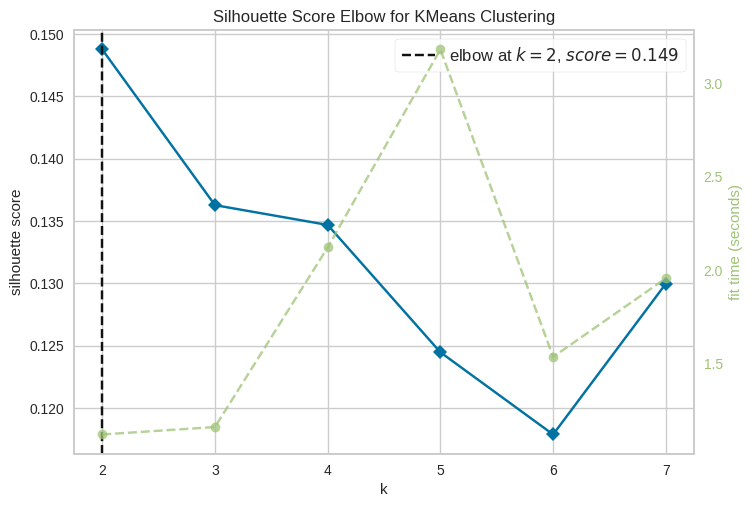

In [ ]:
model = KMeans(random_state=1)  # init='k-means++'
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette')
visualizer.fit(X)
visualizer.show()
plt.show()

In [ ]:
kmeans_silhouette_scores = []
def cal_silhouette_score(data, range_n_clusters):
    for n_cluster in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters=n_cluster, max_iter=50)
        kmeans.fit(data)
        # silhouette score
        score = silhouette_score(data, kmeans.labels_)
        kmeans_silhouette_scores.append(score)
        print(f"For n_clusters={n_cluster}, the silhouette score is {score}")

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
cal_silhouette_score(X, range_n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.14871760737795284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.13630412413842755


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.13466119711217894


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.12457588750402246


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.12535363971185715


In [ ]:

def silhouettePlot(data, range_n_clusters):
    fig,axes = plt.subplots(2,2,figsize=(15,10))
    axes_flat = axes.flatten()
    i = 0

    for n_cluster in range_n_clusters:
        model = KMeans(n_cluster, random_state=0)
        ax = axes_flat[i]
        # Creating SilhouetteVisualizer and assigning it to an axis
        visualizer = SilhouetteVisualizer(model,colors='yellowbrick', ax=axes_flat[i])
        visualizer.fit(data)

        ax.set_title(f'Silhouette Plot for 1000 samples in {n_cluster} clusters, Score={visualizer.silhouette_score_:.3f}')
        ax.set(xlabel='silhouette coefficient values', ylabel='cluster label')

        i=i+1


    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


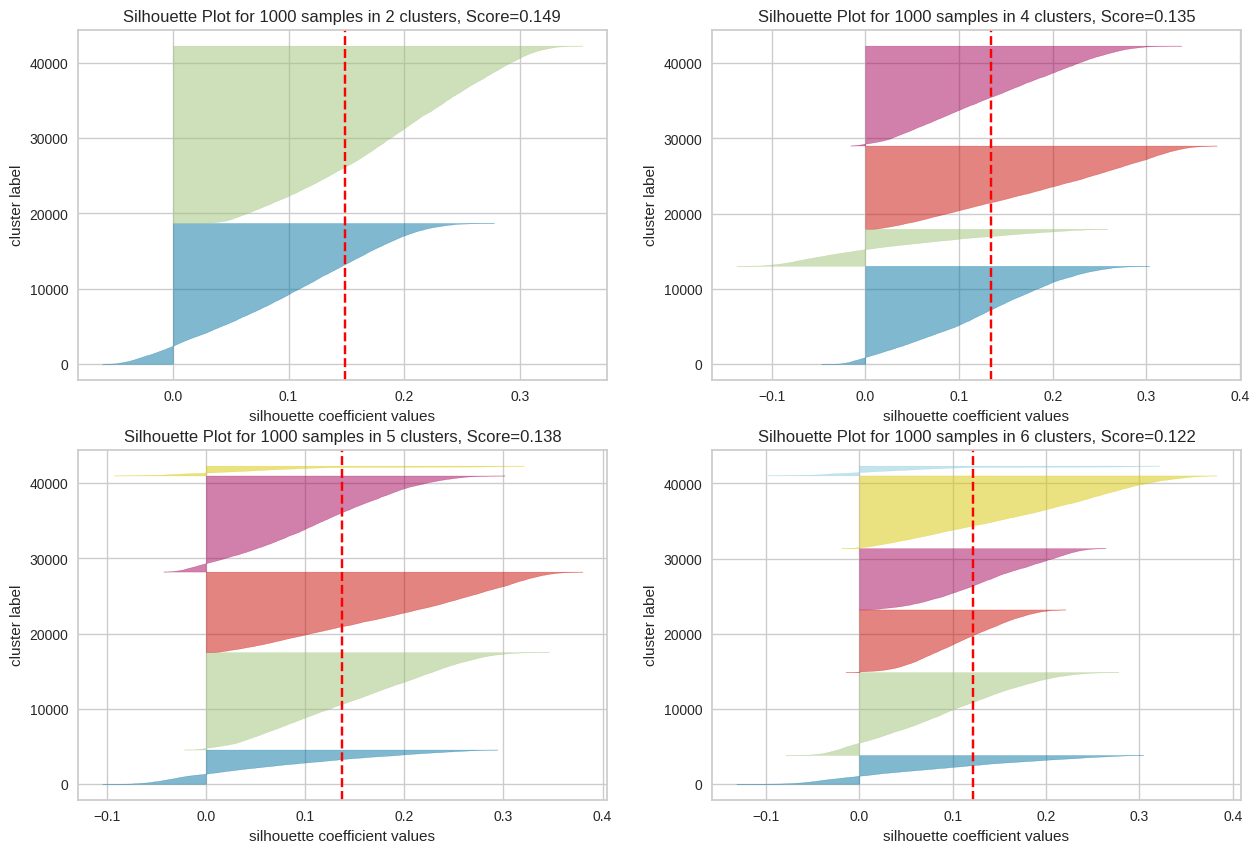

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
range_n_clusters = [2, 4, 5, 6]
silhouettePlot(X, range_n_clusters)

model training by k means clustering

In [ ]:
# Clustering the songs into 4 clusters
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
labels = kmeans.predict(X) # kmeans.labels_
predict = pd.DataFrame(labels)
predict.columns = ['kmeans']

n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


In [ ]:
# determine best clustering solution by mean silhouette score
silh_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(silh_score)

0.13889860953207966


Locality similarity hashing algorithm

In [ ]:
!pip install datasketch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
from datasketch import MinHashLSH, MinHash
import pandas as pd

# Example dataset (replace this with your actual dataset)
data = {
    'song_name': ['Pathology', 'Symbiote', 'Venom'],
    'danceability': [0.719, 0.85, 0.798],
    'energy': [0.493, 0.893, 0.624],
    'tempo': [115.08, 218.05, 147.998],

}


df = pd.DataFrame(data)


lsh = MinHashLSH(threshold=0.5, num_perm=128)


minhashes = {}
for i, row in df.iterrows():
    mh = MinHash(num_perm=128)
    mh.update(str(row['danceability']).encode('utf-8'))
    mh.update(str(row['energy']).encode('utf-8'))
    mh.update(str(row['tempo']).encode('utf-8'))


    lsh.insert(str(row['song_name']), mh)
    if str(row['song_name']) in minhashes:
        minhashes[str(row['song_name'])].update(mh)
    else:
        minhashes[str(row['song_name'])] = mh


query_song_name = 'Venom'
query_minhash = minhashes[query_song_name]


result = lsh.query(query_minhash)

# Calculate percentages for danceability, tempo, and energy of 'Venom'
query_values = df[df['song_name'] == query_song_name][['danceability', 'energy', 'tempo']].values[0]
total = query_values.sum()


print(f"Information about {query_song_name}:")
print(df[df['song_name'] == query_song_name])




Information about Venom:
  song_name  danceability  energy    tempo
2     Venom         0.798   0.624  147.998


In [ ]:
!pip install datasketch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from datasketch import MinHashLSH, MinHash
import pandas as pd

def hash_features(features):
    m = MinHash()
    for f in features:
        m.update(str(f).encode('utf-8'))
    return m

data = pd.read_csv('/content/genres_v2.csv', low_memory=False)

song_features = data[['song_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo']]

lsh = MinHashLSH(threshold=0.5, num_perm=128)

for index, row in song_features.iterrows():
    features = row[1:].tolist()  # Excluding song_name column
    song_hash = hash_features(features)
    song_id = f"Song_{index}"
    lsh.insert(song_id, song_hash)

# Query a song (you can also extract a song from your dataset)
query_song_features = [0.85, 0.893, 5, -4.783, 1, 0.0623, 0.0138, 0.00000414, 0.372, 0.0391, 218.05]
query_song_hash = hash_features(query_song_features)

result = lsh.query(query_song_hash)

# Get song names from the results
nearest_song_names = [data.loc[int(song.split('_')[1])]['song_name'] for song in result]

print("Song for given features:", nearest_song_names)


Song for given features: ['Symbiote', 'Too Good At Goodbyes']


Apriori

In [ ]:


import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load your dataset containing the specified features (replace 'music_data.csv' with your file name)
data = pd.read_csv('/content/genres_v2.csv')


selected_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo']


data_selected = data[selected_features]

# Binarize the data for Apriori algorithm (convert numerical to categorical)
# You can define custom thresholds or bins here based on your data distribution
# For simplicity, let's consider binary values (1 if feature > 0, 0 otherwise)
data_selected_binary = (data_selected > 0).astype(int)


frequent_itemsets = apriori(data_selected_binary, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


print("Discovered Association Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-2bebc4270939>:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/genres_v2.csv')
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Discovered Association Rules:
                antecedents  \
0                  (energy)   
1            (danceability)   
2                     (key)   
3            (danceability)   
4            (danceability)   
...                     ...   
46446      (liveness, mode)   
46447   (speechiness, mode)   
46448        (energy, mode)   
46449  (mode, acousticness)   
46450                (mode)   

                                             consequents  antecedent support  \
0                                         (danceability)            1.000000   
1                                               (energy)            1.000000   
2                                         (danceability)            0.917977   
3                                                  (key)            1.000000   
4                                                 (mode)            1.000000   
...                                                  ...                 ...   
46446  (danceability, tempo, energy, 

In [ ]:
!pip install pandas scikit-learn


Recommendation system

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors


data = pd.read_csv('/content/drive/MyDrive/genres_v2.csv')

# Select the key features for recommendation, including 'genre'
selected_features = ['song_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'genre']


X = data[selected_features].drop(columns=['song_name', 'genre'])


model = NearestNeighbors(n_neighbors=5, algorithm='auto')
model.fit(X)


def get_recommendations(features):

    distances, indices = model.kneighbors([features])


    recommended_indices = indices[0]
    recommended_songs = data.iloc[recommended_indices]

    print("Recommended Indices:", recommended_indices)
    print("Recommended Songs:")
    for i, song in recommended_songs.iterrows():
        print(f"Index {i}:")
        print(f"  Song Name: {song['song_name']}")
        print(f"  Genre: {song['genre']}")
        print("")


example_features = [0.85, 0.893, 5, -4.783, 1, 0.0623, 0.0138, 0.00000414, 0.372, 0.0391, 218.05]


get_recommendations(example_features)


Recommended Indices: [23141 23400  4489 18012 14884]
Recommended Songs:
Index 23141:
  Song Name: nan
  Genre: techhouse

Index 23400:
  Song Name: nan
  Genre: techhouse

Index 4489:
  Song Name: Crystals
  Genre: Dark Trap

Index 18012:
  Song Name: Imagination
  Genre: RnB

Index 14884:
  Song Name: Dreams In A Wraith
  Genre: Rap



<ipython-input-6-621a2023cd51>:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/genres_v2.csv')
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
